- **HW#2. Improve code Efficiency: Sort First!**
- **By: Dima Mikhaylov**
- **ID: agp7dp**

# 5012 HW #2. Improve code Efficiency: Sort First!

## Scenario. 

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 


Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
import time
from copy import deepcopy
from numpy import argmax

Answer Question #1 in the comments of the code chunk below. 

**Answer: as shown in the comments to the code below, T(n) is O(n^3). Although there is only one for loop, inside this loop a variable `agrMax` is recreated in linear time for every new iteration. In addition to that, every iteration `maxVal` is also created inside the loop, but it is not used anywhere else.**

In [9]:
def computeAllTPRs(true_label, confs):
    
        '''
        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        # used to replace max value found thus far
        sentinelValue = -1 #C: constant time O(1)
    
        totalPositives = sum(true_label) #C: linear time O(n)
        totalNegatives = len(true_label) - totalPositives #C: constant time O(1)
        #print(true_label)  #C: linear time O(n)
        truePositives = 0 #C: constant time O(1)
        falsePositives = 0 #C: constant time O(1)
        
        # Hint: Consider Memory Management
        
        truePositiveRate = [] #C: constant time O(1)
        falsePositiveRate = [] #C: constant time O(1)

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 

        for i in range(len(confs)): #C: linear time O(n)
            maxVal = max(confs)  #C: linear time O(n), not used in computation
            argMax = argmax(confs) #C: linear time O(n)
            
            confs[argMax] = sentinelValue #C: constant time O(1)
            #print(argMax)
            
            if true_label[argMax]==1: #C: constant time O(1)
                truePositives += 1 #C: constant time O(1)
            else:
                falsePositives += 1 #C: constant time O(1)

            truePositiveRate.append(truePositives/totalPositives) #C: constant time O(1)
            falsePositiveRate.append(falsePositives/totalNegatives) #C: constant time O(1)
            #print(truePositiveRate)

        # Plot FPR vs TPR for all possible thresholds 
#         plt.plot(falsePositiveRate,truePositiveRate, label ='class' + str(i) + ' to all')
#         plt.legend()
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.show()


In [14]:
def testComputeAllTPRs(numSamples):
    confList = []
    labels = [] 
    maxVal = 10000
    #numSamples = 10000
    start = time.perf_counter()
    
    for i in range(0,numSamples): #C: O(n) dominates
        n = random.randint(1,maxVal)
        confList.append(n/maxVal)
        if n/maxVal > .5: 
            lab = 1 
        else: 
            lab = 0
        labels.append(lab)

    computeAllTPRs(labels, confList) 
    # Print runtime using built in time() function 
    print("Run time of the original function is ", time.perf_counter() - start, "for sample size of", numSamples)


In [15]:
testComputeAllTPRs(10000)

Run time of the original function is  7.891947471000094 for sample size of 10000


Below, provide your implementation for Question #2.

**Answer: in order to improve time complexity, the inputs `true_label` and `confs` are zipped and sorted before going into the loop, so that the highest confidence and corresponding label are always stored first. When iterating through the loop, first element is being checked like this `sorted_list[i][0] == 1`. This brings the worst case complexity down from O(n^3) to O(n log n) as there is only one pass through the sorted elements.**

In [17]:
def computeAllTPRs_imporved(true_label, confs):
    
        '''
        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method zips and sorts intups computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        totalPositives = sum(true_label) #C: linear time O(n)
        totalNegatives = len(true_label) - totalPositives #C: constant time O(1)
        truePositives = 0 #C: constant time O(1)
        falsePositives = 0 #C: constant time O(1)
        
        # Hint: Consider Memory Management
        truePositiveRate = [] #C: constant time O(1)
        falsePositiveRate = [] #C: constant time O(1)

        #Hint: If you sort the confidences first you can improve the iteration scheme.
        zipped_list = list(zip(true_label, confs)) #C: O(n)
        sorted_list = sorted(zipped_list, reverse=True) #C: log time O(n log n) outside the loop
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 
        for i in range(len(sorted_list)): #C: linear time O(n)
            if sorted_list[i][0] == 1:
                truePositives += 1 #C: constant time O(1)
            else:
                falsePositives += 1 #C: constant time O(1)
                
            truePositiveRate.append(truePositives/totalPositives) #C: constant time O(1)
            falsePositiveRate.append(falsePositives/totalNegatives) #C: constant time O(1)
            
        # Plot FPR vs TPR for all possible thresholds 
#         plt.plot(falsePositiveRate,truePositiveRate, label ='class' + str(i) + ' to all')
#         plt.legend()
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.show()

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods. 

**Answer: it is expected that the improved function with sorted inputs will run in log linear time compared to the original function that runs in cubic time, i.e. for 10 inputs it requires 1000 operations. For example, empirical runtime for 10,000 elements went down from 9.11 seconds to 0.03 seconds.**

In [18]:
# Original function runtime:
testComputeAllTPRs(10000)

Run time of the original function is  8.108860993999997 for sample size of 10000


In [19]:
# Method to test the improved function
def testComputeAllTPRs_improved(numSamples):
    confList = []
    labels = [] 
    maxVal = 10000
    #numSamples = 10000
    start = time.perf_counter()
    
    for i in range(0,numSamples): # O(n)
        n = random.randint(1,maxVal)
        confList.append(n/maxVal)
        if n/maxVal > .5: 
            lab = 1 
        else: 
            lab = 0
        labels.append(lab)

    computeAllTPRs_imporved(labels, confList) # O(n) * O(n log n)
    print("Run time of the improved function is ", time.perf_counter() - start, "for sample size of", numSamples)

In [20]:
# Improved function runtime:
testComputeAllTPRs_improved(10000)

Run time of the improved function is  0.027417323000008764 for sample size of 10000


Run time of the original function is  0.09351911199996721 for sample size of 1000
Run time of the improved function is  0.001534033000098134 for sample size of 1000
Run time of the original function is  0.08947914599980322 for sample size of 1000
Run time of the improved function is  0.0014535099999193335 for sample size of 1000
Run time of the original function is  0.09385364400009166 for sample size of 1000
Run time of the improved function is  0.0017013239998959762 for sample size of 1000
Run time of the original function is  0.08905998400018689 for sample size of 1000
Run time of the improved function is  0.0015100959999472252 for sample size of 1000
Run time of the original function is  0.08892813600004956 for sample size of 1000
Run time of the improved function is  0.001519154999868988 for sample size of 1000
Run time of the original function is  0.09191268799986574 for sample size of 1000
Run time of the improved function is  0.0014572850000149629 for sample size of 1000
Run ti

Text(0, 0.5, 'Runtime')

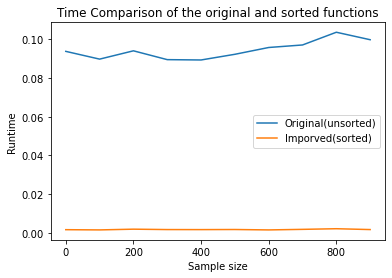

In [25]:
## Record the time results
originalTime = []
sortedTime  = []

size = 1000
stepSize = 100
## Calculate the time required by 2 methods
for i in range(0, size, stepSize):
    
    ## Run the original function
    start = time.perf_counter()
    testComputeAllTPRs(size)
    originalTime.append(time.perf_counter() - start)
    
    ## Run the improved function
    start = time.perf_counter()
    testComputeAllTPRs_improved(size)
    sortedTime.append(time.perf_counter() - start)

## Plot the results
plt.plot(range(0, size, stepSize), originalTime, label = 'Original(unsorted)')
plt.plot(range(0, size, stepSize), sortedTime, label = 'Imporved(sorted)')
plt.legend(frameon = 'none')
plt.title('Time Comparison of the original and sorted functions')
plt.xlabel('Sample size')
plt.ylabel('Runtime')


**As shown above, the runtime of Improved (sorted) function remains flat, but the runtime of the Original (unsorted) tends to increase with the sample size.**